In [1]:
# Modelos de classificação
# sabado 04/09


In [2]:
#Conjunto de importacoes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('dados_cryotherapy.csv')

In [4]:
df.head()

,Sexo,Idade,Tempo,Numero_Verrugas,Tipo,Area,Resultado_Tratamento
0,1,35,12,5,1,100,0
1,1,29,7,5,1,96,1
2,1,50,8,1,3,132,0
3,1,32,11,7,3,750,0
4,1,67,9,1,1,42,0


In [5]:
df.describe()

,Sexo,Idade,Tempo,Numero_Verrugas,Tipo,Area,Resultado_Tratamento
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,1.477778,28.600000,7.344444,5.511111,1.700000,85.833333,0.533333
std,0.502304,13.360852,3.379253,3.567155,0.905042,131.733153,0.501683
min,1.000000,15.000000,1.000000,1.000000,1.000000,4.000000,0.000000
25%,1.000000,18.000000,4.000000,2.000000,1.000000,20.000000,0.000000
50%,1.000000,25.500000,8.000000,5.000000,1.000000,70.000000,1.000000
75%,2.000000,35.000000,10.000000,8.000000,3.000000,100.000000,1.000000
max,2.000000,67.000000,12.000000,12.000000,3.000000,750.000000,1.000000


In [7]:
#Definição dos atributos que deverao ser treinados para gerar o modelo de classificacao
data_treino = np.array(df[['Sexo', 'Idade', 'Numero_Verrugas', 'Tipo', 'Area']])
#Definição do atributo de classificacao
data_classif = np.array(df['Resultado_Tratamento'])


In [8]:
# Correlação não implica causalidade
def plot_corr(df, size=35):
    corr = df.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns) 

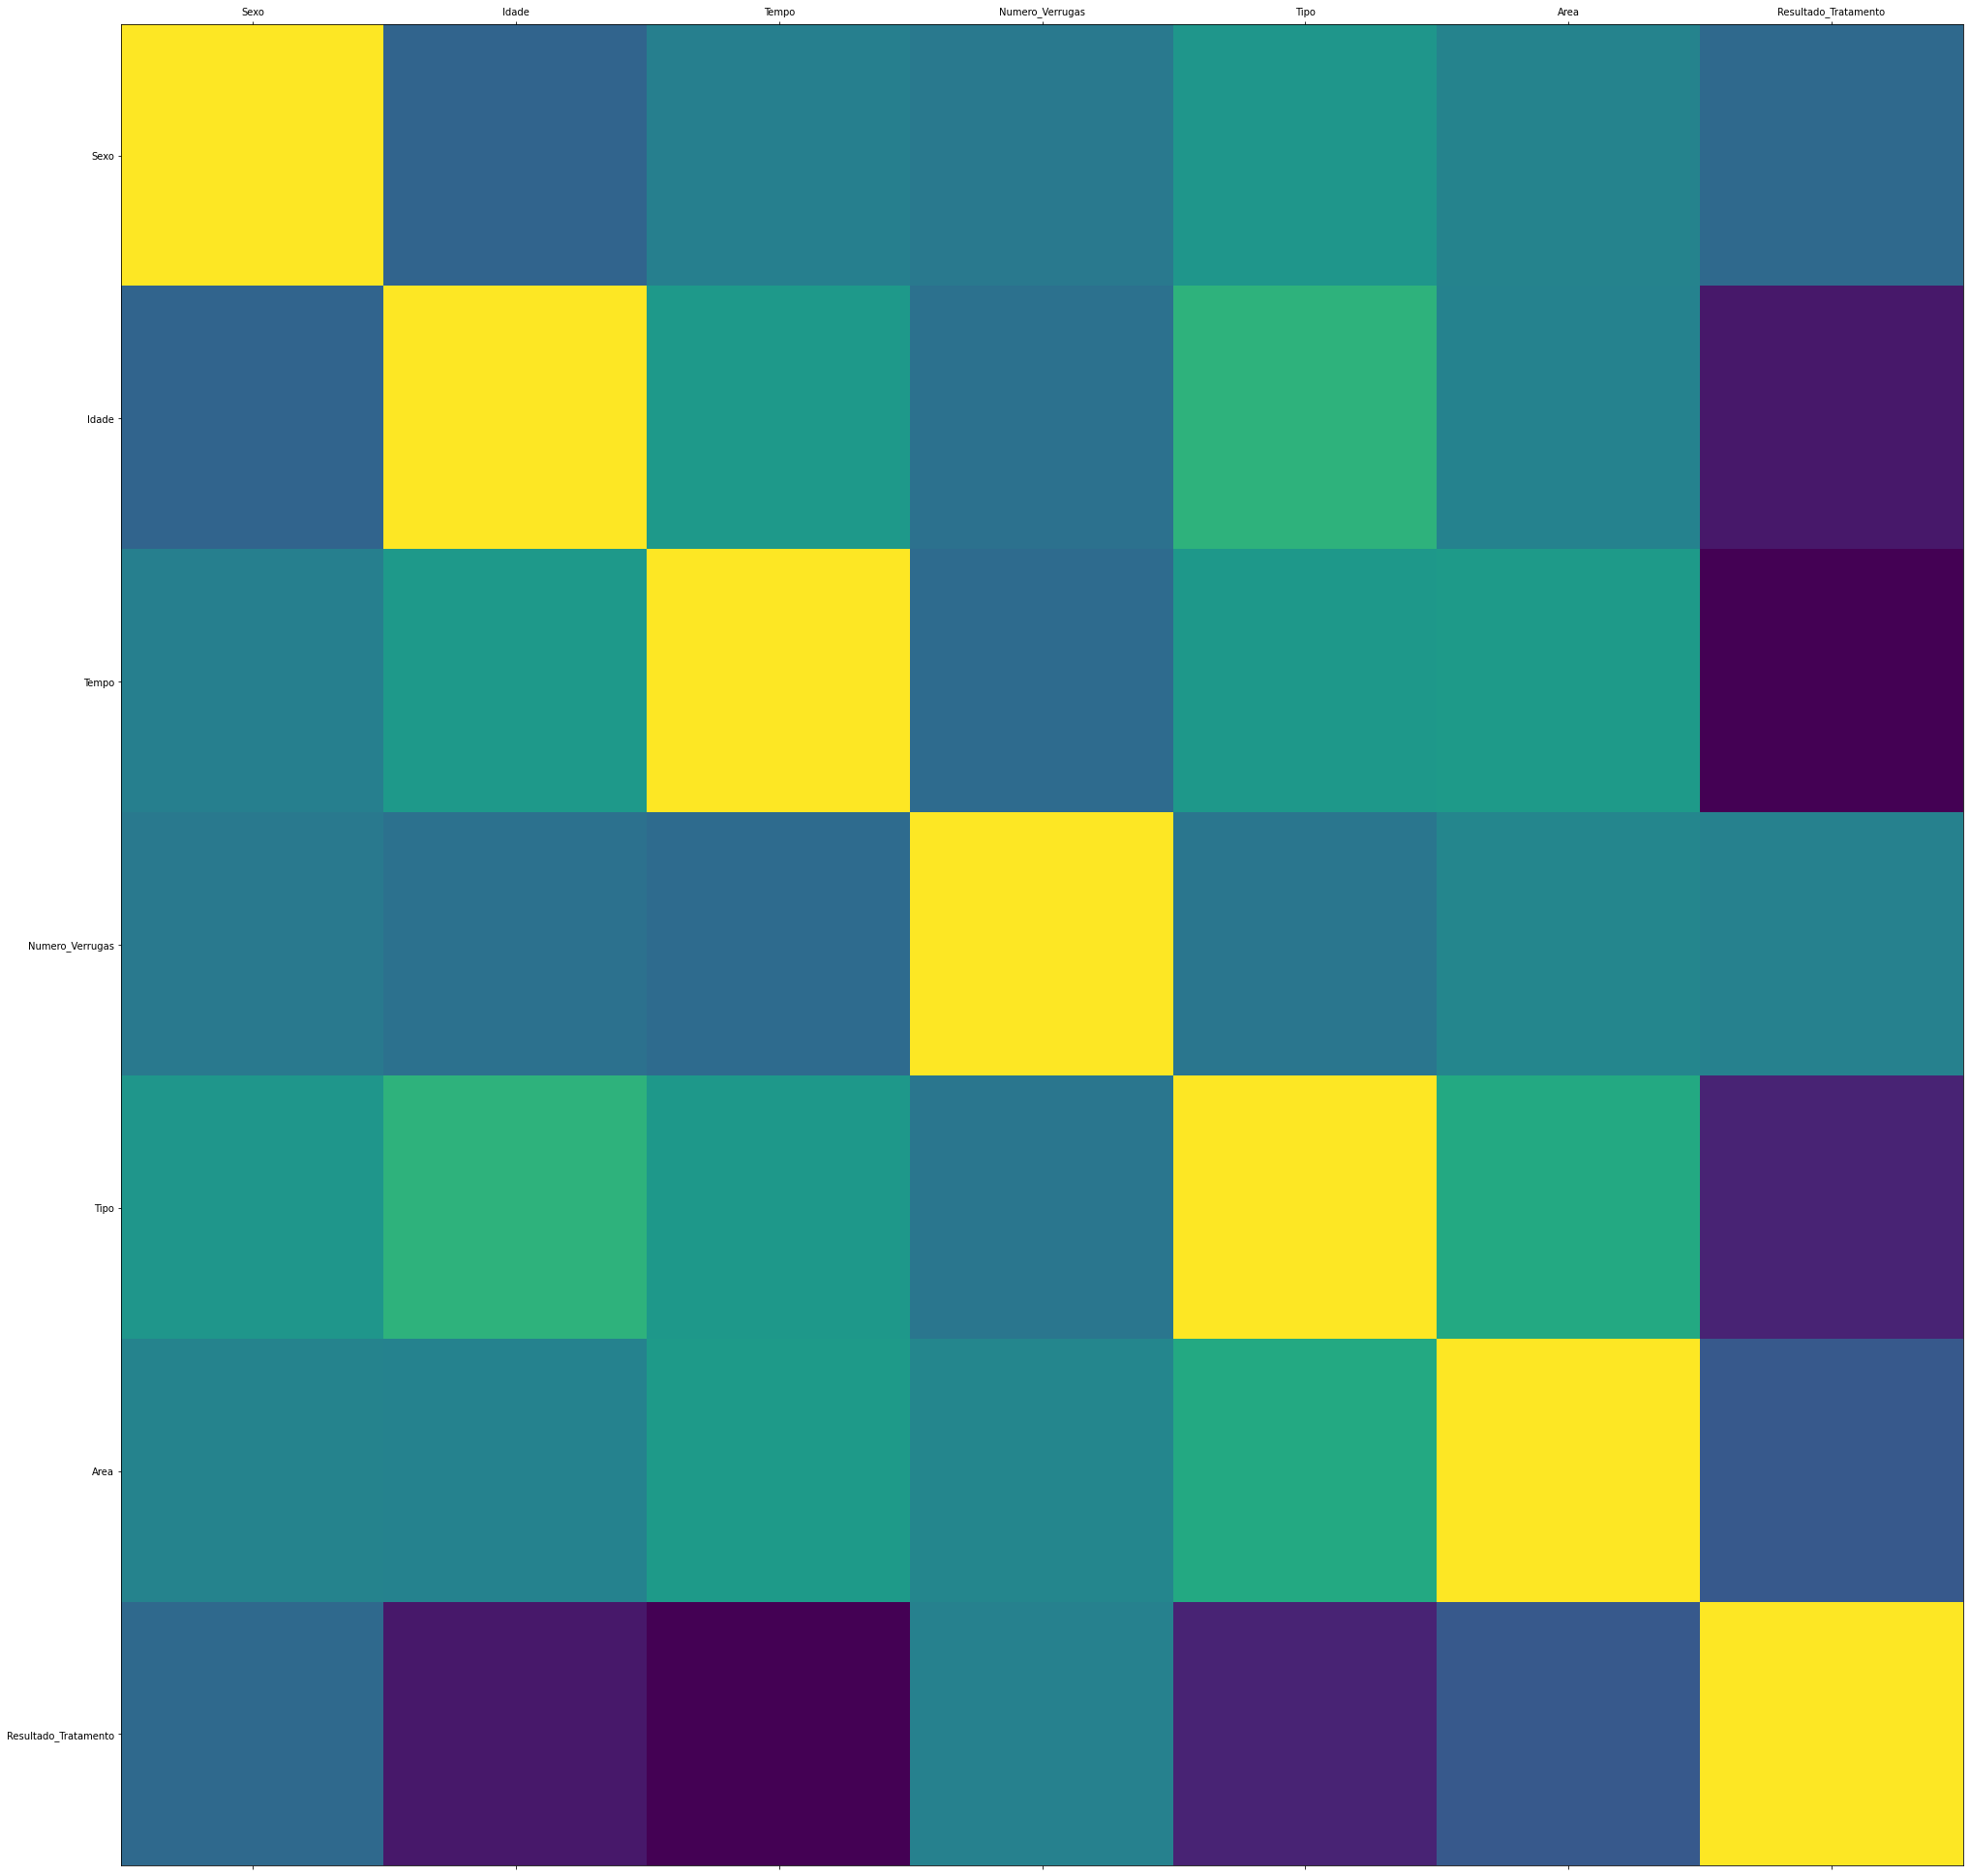

In [9]:
# Criando o gráfico - Matriz de Correlação..
plot_corr(df)

In [10]:
x_treino, x_val, y_treino, y_val = train_test_split(data_treino, data_classif, test_size=0.30)

In [11]:
#Apresentacao dos dados selecionados para o conjunto de treinamento e validacao
print("-----------------------")
print("Conjunto de Treinamento")
print(x_treino)
print("Conjunto de Validacao")
print(x_val)
print("-----------------------")

-----------------------
Conjunto de Treinamento
[[  1  67   7   1  42]
 [  1  22   2   1  70]
 [  2  15  12   1  30]
 [  2  35   6   3 100]
 [  1  17   4   1  63]
 [  2  34   3   3  95]
 [  1  27   7   1   6]
 [  1  34   1   3 150]
 [  2  15   2   1  30]
 [  2  30   8   3 115]
 [  2  27   2   1   6]
 [  1  15   5   1   6]
 [  2  41   2   2  20]
 [  2  28  11   1 100]
 [  1  17   2   1  10]
 [  2  17   2   1  10]
 [  1  36   2   1   8]
 [  2  32  12   3 750]
 [  1  35   2   1 100]
 [  1  24  10   1  20]
 [  1  32   7   3 750]
 [  2  23   5   3  72]
 [  2  15  10   3  70]
 [  2  67  12   3  42]
 [  1  18   1   1  80]
 [  1  59   3   3  20]
 [  1  35   5   1 100]
 [  1  50  11   3 132]
 [  1  67  11   3  20]
 [  1  20  11   1  75]
 [  2  21   5   1  35]
 [  1  20   3   1   6]
 [  2  15  12   3  70]
 [  1  15  11   1  30]
 [  1  15   2   1   4]
 [  1  34   1   3 150]
 [  1  19   8   1 160]
 [  2  35   5   3 100]
 [  2  40   1   2  80]
 [  2  21   7   1  35]
 [  2  50   4   3 132]
 [  2  28

In [13]:
print("{0:0.2f}% nos dados de treino".format((len(x_treino)/len(df.index)) * 100))
print("{0:0.2f}% nos dados de teste".format((len(x_val)/len(df.index)) * 100))

70.00% nos dados de treino
30.00% nos dados de teste


In [14]:
modelo_NB = GaussianNB()
modelo_NB.fit(x_treino, y_treino)

GaussianNB()

In [15]:
#Predição e acurácia para o conjunto de treinamento
print("Predicao para o conjunto de treinamento")
y_pred_treino = modelo_NB.predict(x_treino)
print("Acuracia para o conjunto de treinamento")
print(accuracy_score(y_treino, y_pred_treino))
print("Na Base de Treinamento")

Predicao para o conjunto de treinamento
Acuracia para o conjunto de treinamento
0.746031746031746
Na Base de Treinamento


In [16]:
print("Predicao para o conjunto de validacao")
y_pred_val = modelo_NB.predict(x_val)
print("Acuracia para o conjunto de validacao")
print(accuracy_score(y_val, y_pred_val))
print("na Base de Teste")

Predicao para o conjunto de validacao
Acuracia para o conjunto de validacao
0.7777777777777778
na Base de Teste


In [18]:
# Criando uma Confusion Matrix
from sklearn import metrics
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(y_val, y_pred_val, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_val, y_pred_val, labels = [1, 0]))

Confusion Matrix
[[12  0]
 [ 6  9]]

Classification Report
              precision    recall  f1-score   support

           1       0.67      1.00      0.80        12
           0       1.00      0.60      0.75        15

    accuracy                           0.78        27
   macro avg       0.83      0.80      0.77        27
weighted avg       0.85      0.78      0.77        27

